<a href="https://colab.research.google.com/github/kirtisingh-001/kirtisingh-001-DataScience_Day_wise_work/blob/main/Day7Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


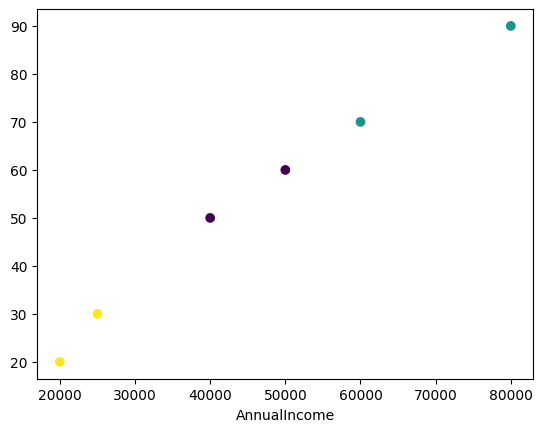

In [8]:
# Example: Customer Segmentation for a Retail Company 🛍️
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}
df=pd.DataFrame(data)
X=df[['Age','AnnualIncome','SpendingScore']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df)
plt.scatter(df['AnnualIncome'],df['SpendingScore'],c=df['Cluster'],cmap='viridis')
plt.xlabel('AnnualIncome')
plt.show()

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  Cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        3
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


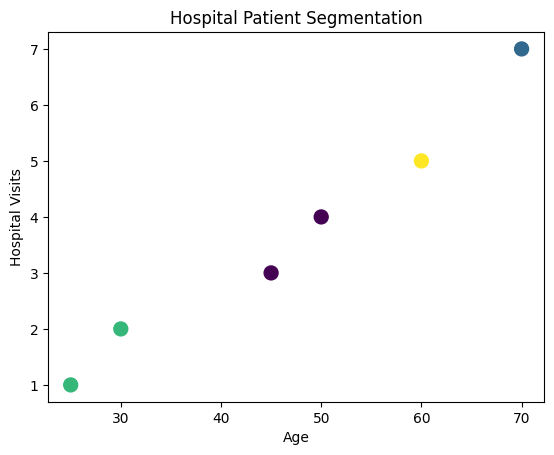

In [9]:
# Example: Hospital Patient Segmentation 🏥
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently
# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}
df=pd.DataFrame(data)
X=df[['Age','BMI','HospitalVisits','ChronicConditions']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df)
plt.scatter(df['Age'], df['HospitalVisits'],
            c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Hospital Visits')
plt.title('Hospital Patient Segmentation')
plt.show()

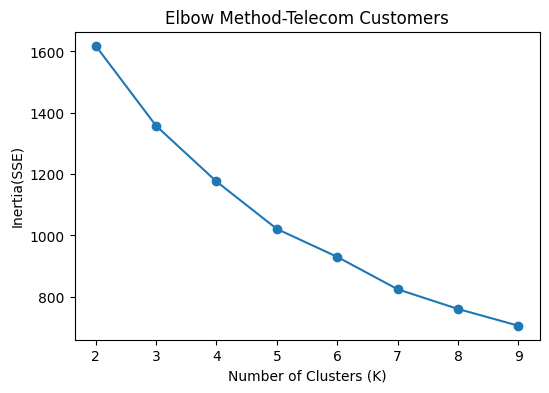

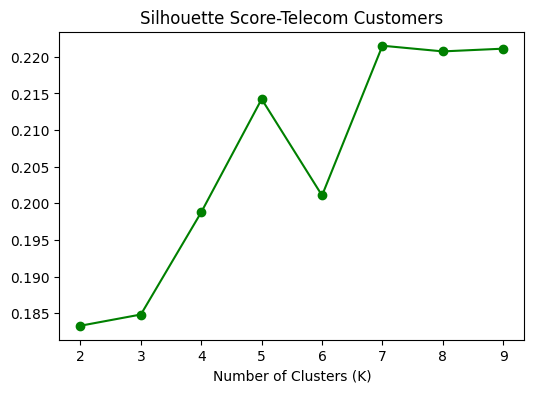

Best K based on silhouette score:7


In [18]:
# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill
# amount, average call duration, internet usage, and number of support calls. The company wants
# to group customers into meaningful segments to design targeted marketing campaigns and improve customer
#  service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated
# and meaningful groups.


# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),
    'CallDuration': np.random.randint(50, 500, 500),
    'InternetUsage': np.random.randint(10, 300, 500),
    'SupportCalls': np.random.randint(0, 10, 500)
}
df = pd.DataFrame(data)
X = df[['MonthlyBill', 'CallDuration', 'InternetUsage', 'SupportCalls']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
inertia=[]
K_range=range(2,10)
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(K_range,inertia,marker='o')
plt.title('Elbow Method-Telecom Customers')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia(SSE)')
plt.show()
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(6,4))
plt.plot(K_range,silhouette_scores,marker='o',color='green')
plt.title('Silhouette Score-Telecom Customers')
plt.xlabel('Number of Clusters (K)')
plt.show()
best_k=K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K based on silhouette score:{best_k}")

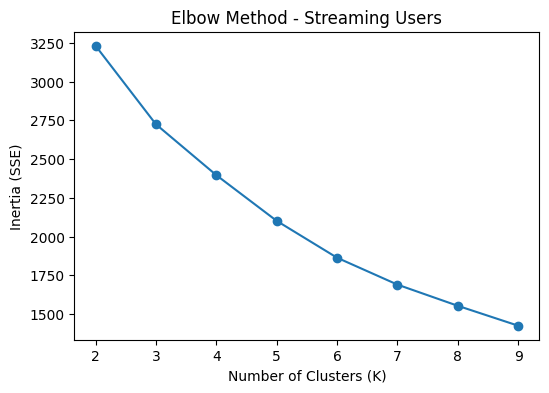

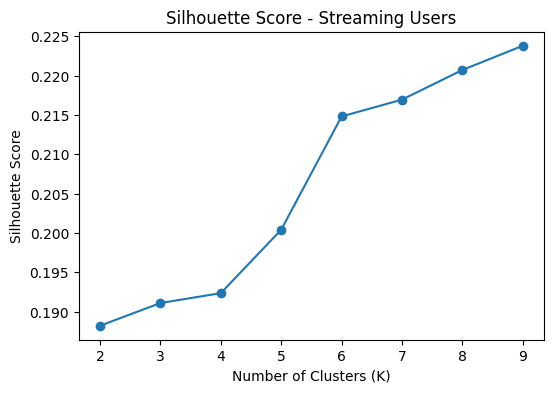

Best K based on Silhouette Score: 9
   UserID  WatchTimePerWeek  GenrePreferenceScore  DevicesUsed  \
0       1                30                     5            1   
1       2                16                     1            1   
2       3                 9                     5            2   
3       4                22                     5            1   
4       5                20                     3            2   

   SubscriptionPauses  Cluster  
0                   3        2  
1                   4        3  
2                   0        8  
3                   4        1  
4                   1        5  


In [19]:
# 🎬 Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
np.random.seed(42)
data = {
    'UserID': range(1, 1001),
    'WatchTimePerWeek': np.random.randint(2, 40, 1000),
    'GenrePreferenceScore': np.random.randint(1, 6, 1000),
    'DevicesUsed': np.random.randint(1, 4, 1000),
    'SubscriptionPauses': np.random.randint(0, 5, 1000)
}
df = pd.DataFrame(data)
X = df[['WatchTimePerWeek', 'GenrePreferenceScore',
        'DevicesUsed', 'SubscriptionPauses']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Streaming Users')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.show()
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score - Streaming Users')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()
best_k = K_range[np.argmax(silhouette_scores)]
print("Best K based on Silhouette Score:", best_k)
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(X_scaled)
print(df.head())


